# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Data Validation

In [95]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [59]:
# Load data
df = pd.read_csv("recipe_site_traffic_2212.csv")

In [60]:
# Preview
print(df.head())
print(df.info())

   recipe  calories  carbohydrate  ...   category  servings high_traffic
0       1       NaN           NaN  ...       Pork         6         High
1       2     35.48         38.56  ...     Potato         4         High
2       3    914.28         42.68  ...  Breakfast         1          NaN
3       4     97.03         30.56  ...  Beverages         4         High
4       5     27.05          1.85  ...  Beverages         4          NaN

[5 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes

In [61]:
# Check missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64


In [62]:
duplicate_rows_count = df.duplicated().sum()
print("Duplicated row values:\n", duplicate_rows_count)

Duplicated row values:
 0


# Data Cleaning

In [63]:
# Fill numeric missing values with median
# Use median, better than mean when skewed or outliers are present
for col in ['calories', 'carbohydrate', 'sugar', 'protein']:
    df[col] = df[col].fillna(df[col].median())


In [64]:
df['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [65]:
# Merge data into broader/fewer categories
df['category'] = df['category'].replace({
    'Chicken Breast': 'Meat',
    'Pork': 'Meat',
    'Chicken': 'Meat',
    'Potato': 'Vegetable',
    'Lunch/Snacks': 'Lunch & Snacks'
})

# Clean spaces, cases 
df['category'] = df['category'].str.strip().str.title()

In [66]:
df['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [67]:
# Extract digits only and convert to int
df['servings'] = df['servings'].apply(lambda x: int(re.search(r'\d+', str(x)).group()))

# Convert servings column to numeric 
df['servings'] = df['servings'].astype(int)

In [68]:
df['high_traffic'].unique()

array(['High', nan], dtype=object)

In [69]:
# Fill categorial missing values with Unkown
df['high_traffic'] = df['high_traffic'].fillna("Unknown")

# Feature Engineering

In [ ]:
# Calories per serving
df['calories_per_serving'] = df['calories'] / df['servings']

In [75]:
# Macronutrient ratios
# Percent of calories coming from carbs, sugar, protein.
# Helps reveal whether a recipe is “carb-heavy” vs “protein-heavy.”
df['protein_ratio'] = df['protein'] / (df['carbohydrate'] + df['sugar'] + df['protein'])
df['carb_ratio'] = df['carbohydrate'] / (df['carbohydrate'] + df['sugar'] + df['protein'])
df['sugar_ratio'] = df['sugar'] / (df['carbohydrate'] + df['sugar'] + df['protein'])



In [83]:
# 3. High calorie indicator
# Create a binary feature: high_calorie = 1 if calories_per_serving > threshold (say 500)
df['high_calorie'] = (df['calories_per_serving'] > 500).astype(int)

In [77]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,calories_per_serving,protein_ratio,carb_ratio,sugar_ratio,high_calorie
0,1,288.55,21.48,4.55,10.80,Meat,6,High,48.091667,0.293239,0.583220,0.123541,0
1,2,35.48,38.56,0.66,0.92,Vegetable,4,High,8.870000,0.022920,0.960638,0.016442,0
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Unknown,914.280000,0.059198,0.877287,0.063515,1
3,4,97.03,30.56,38.63,0.02,Beverages,4,High,24.257500,0.000289,0.441555,0.558156,0
4,5,27.05,1.85,0.80,0.53,Beverages,4,Unknown,6.762500,0.166667,0.581761,0.251572,0


# Exploratory Analysis

In [70]:
sns.set_palette("Set2")  # clean and consistent palette

## Single Variable Plots

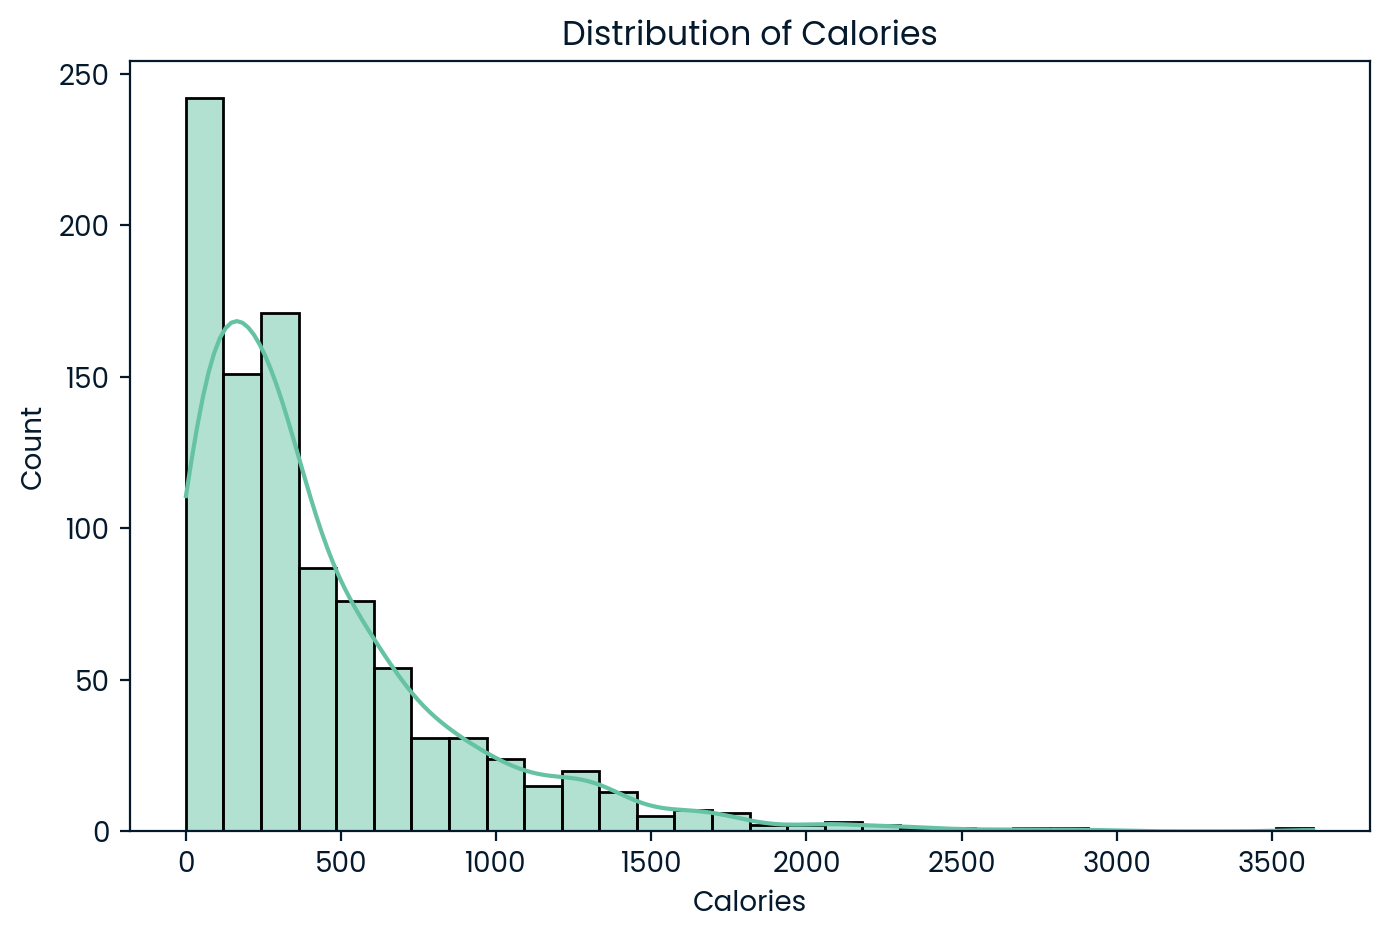

In [71]:
# What does the distribution of calories look like across recipes?
# Distribution of calories
plt.figure(figsize=(8,5))
sns.histplot(df['calories'], bins=30, kde=True)
plt.title("Distribution of Calories")
plt.xlabel("Calories")
plt.ylabel("Count")
plt.show()

# ----- Finding ------
# Most recipes are under 500 calories, but a few go beyond 1000, showing strong right skew (outliers with high calorie meals).

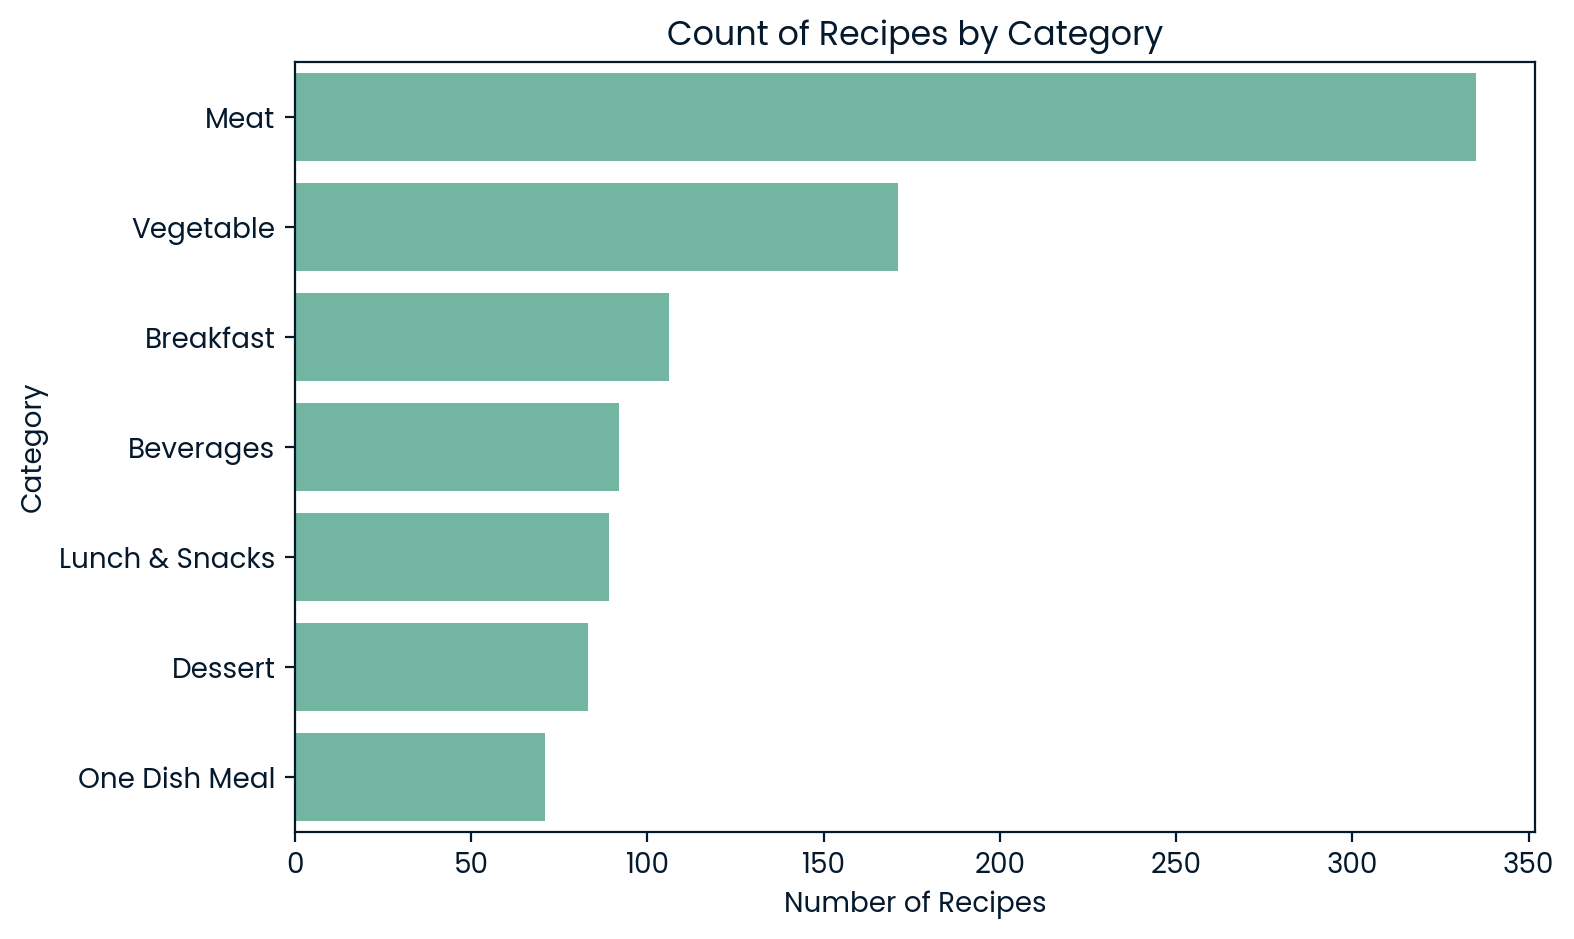

In [72]:
# Which recipe categories are most common?
plt.figure(figsize=(8,5))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title("Count of Recipes by Category")
plt.xlabel("Number of Recipes")
plt.ylabel("Category")
plt.show()

# ----- Finding ------
# Categories like “Meat” and “Vegetable” dominate, while “Dessert” and “Pork” have fewer recipes.

## Multi-Variable Plots

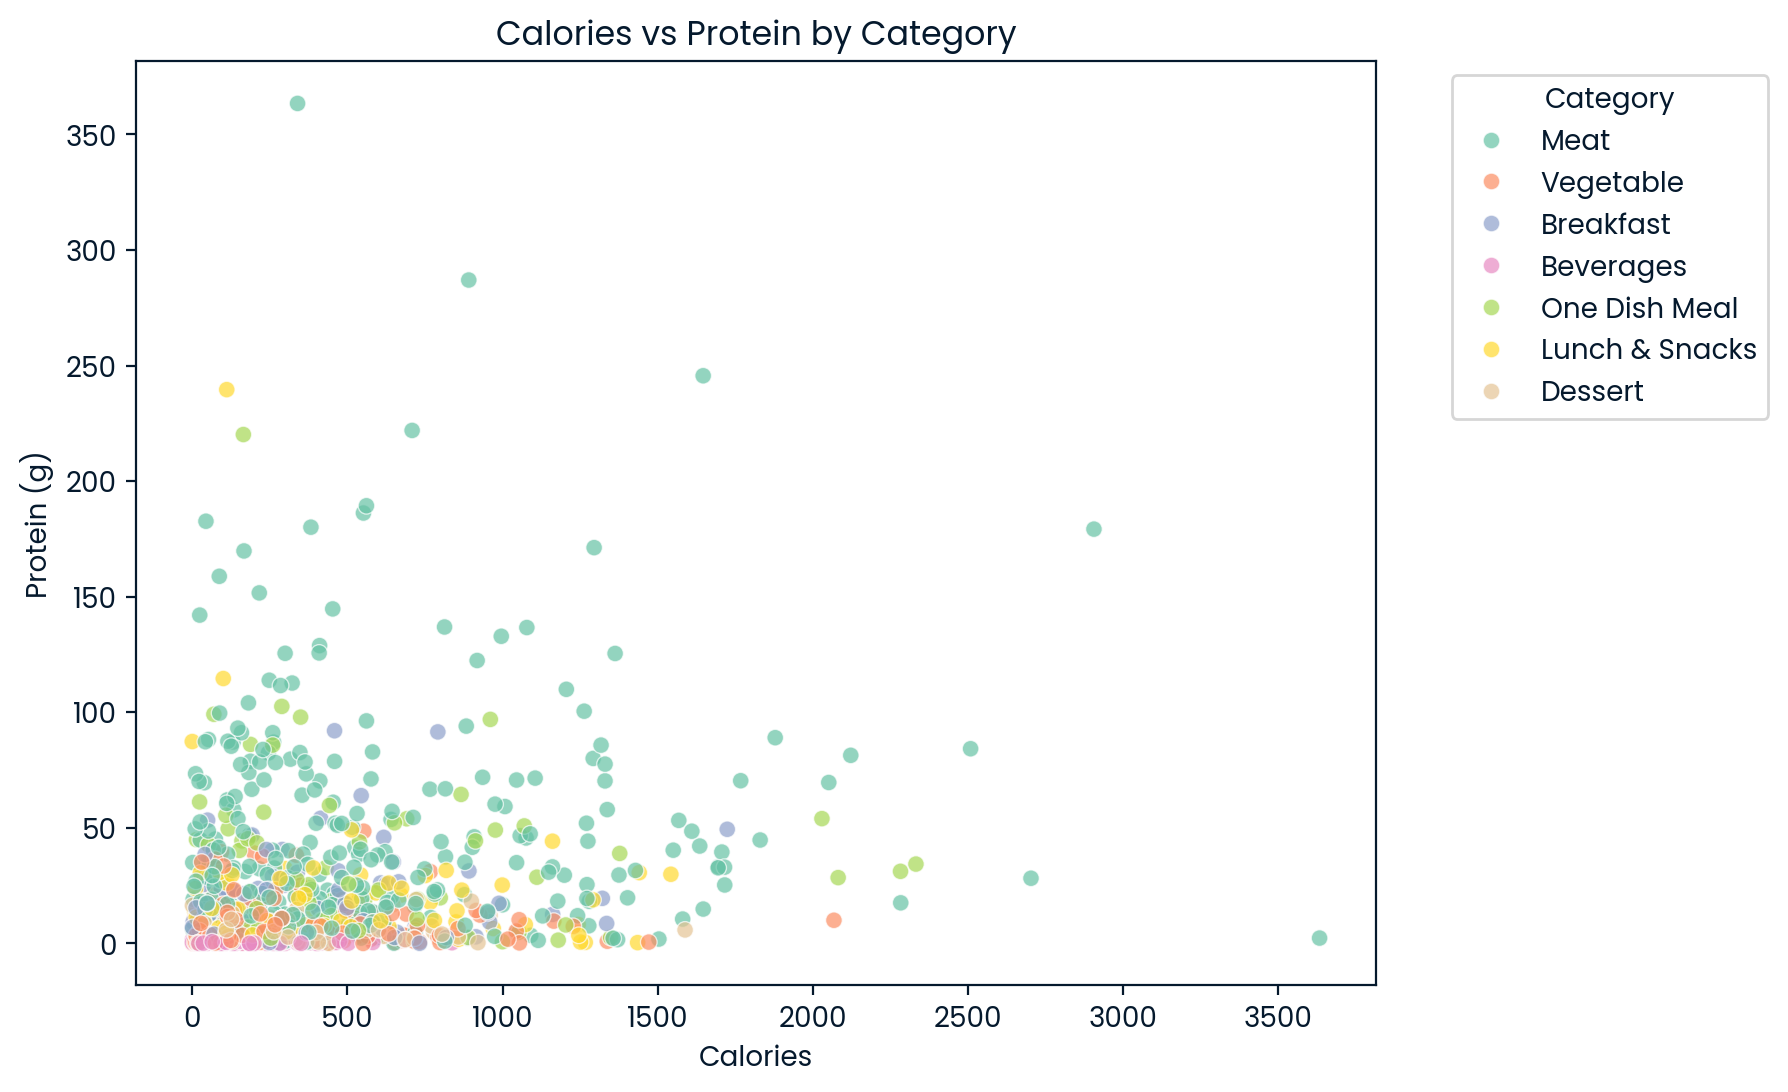

In [73]:
# How do calories and protein relate, and does category influence this?
plt.figure(figsize=(8,6))
sns.scatterplot(x='calories', y='protein', hue='category', data=df, alpha=0.7)
plt.title("Calories vs Protein by Category")
plt.xlabel("Calories")
plt.ylabel("Protein (g)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# ----- Finding ------
# Most recipes fall into the lower–moderate calorie range, with Meat dishes standing out as the primary source of protein, while Beverages and Desserts mainly add calories with little nutritional value, and Vegetable recipes remain lighter in both calories and protein.

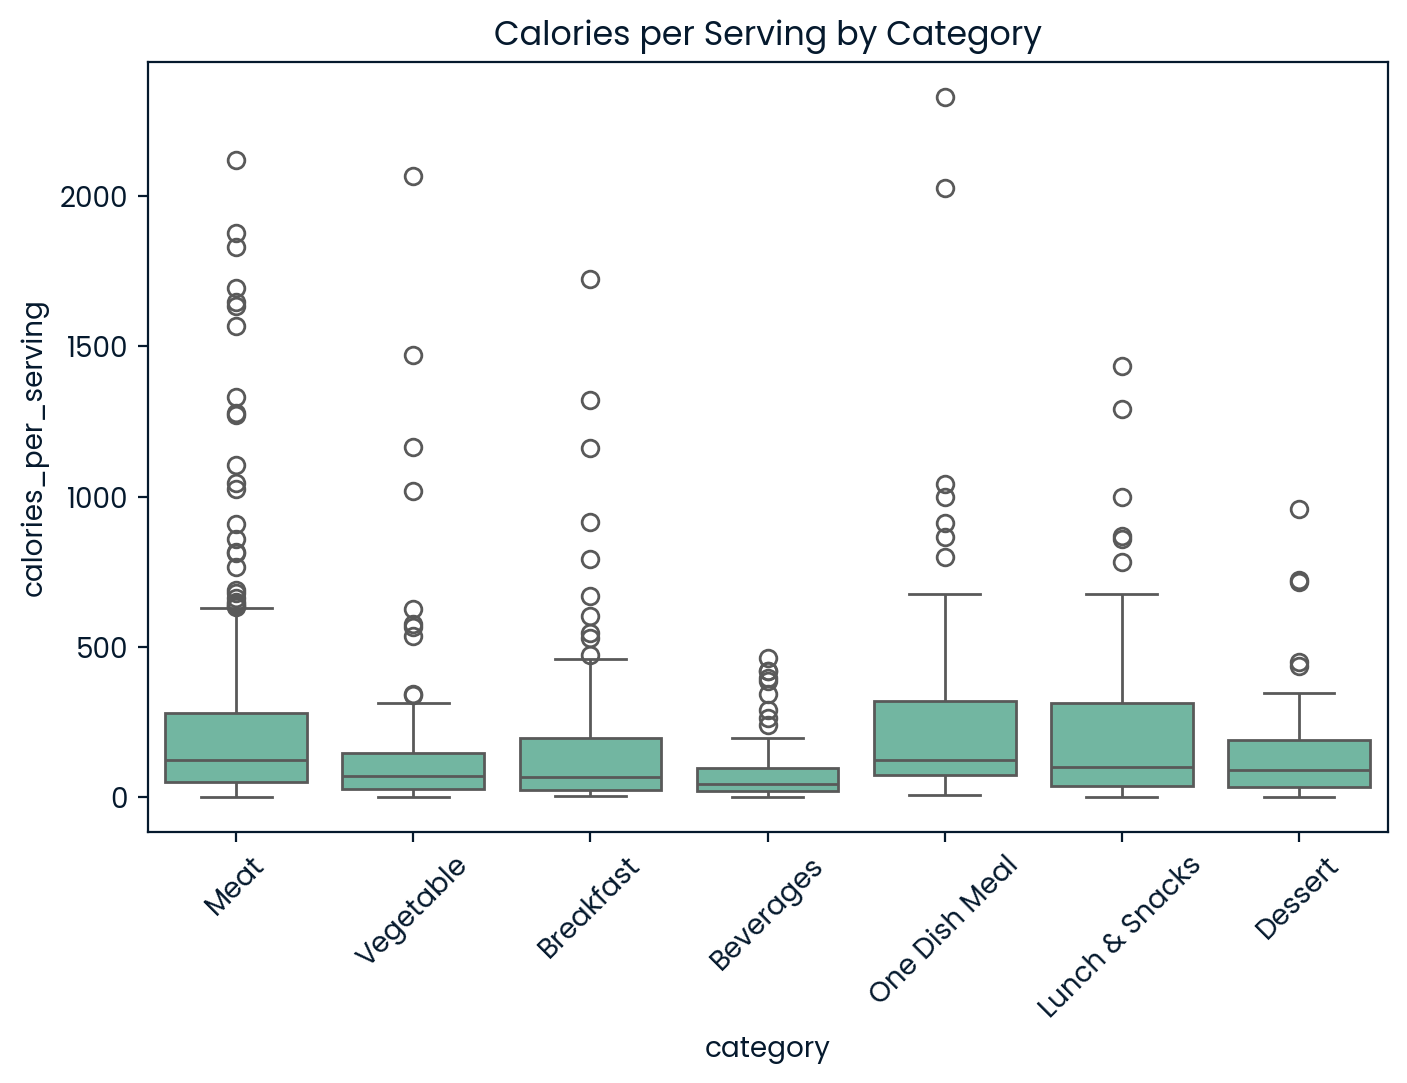

In [78]:
# Which categories are most calorie-dense per portion?
plt.figure(figsize=(8,5))
sns.boxplot(x='category', y='calories_per_serving', data=df)
plt.title("Calories per Serving by Category")
plt.xticks(rotation=45)
plt.show()

# ----- Finding ------
# Desserts and Pork recipes have higher calories per serving, while Beverages and Vegetables are lighter.


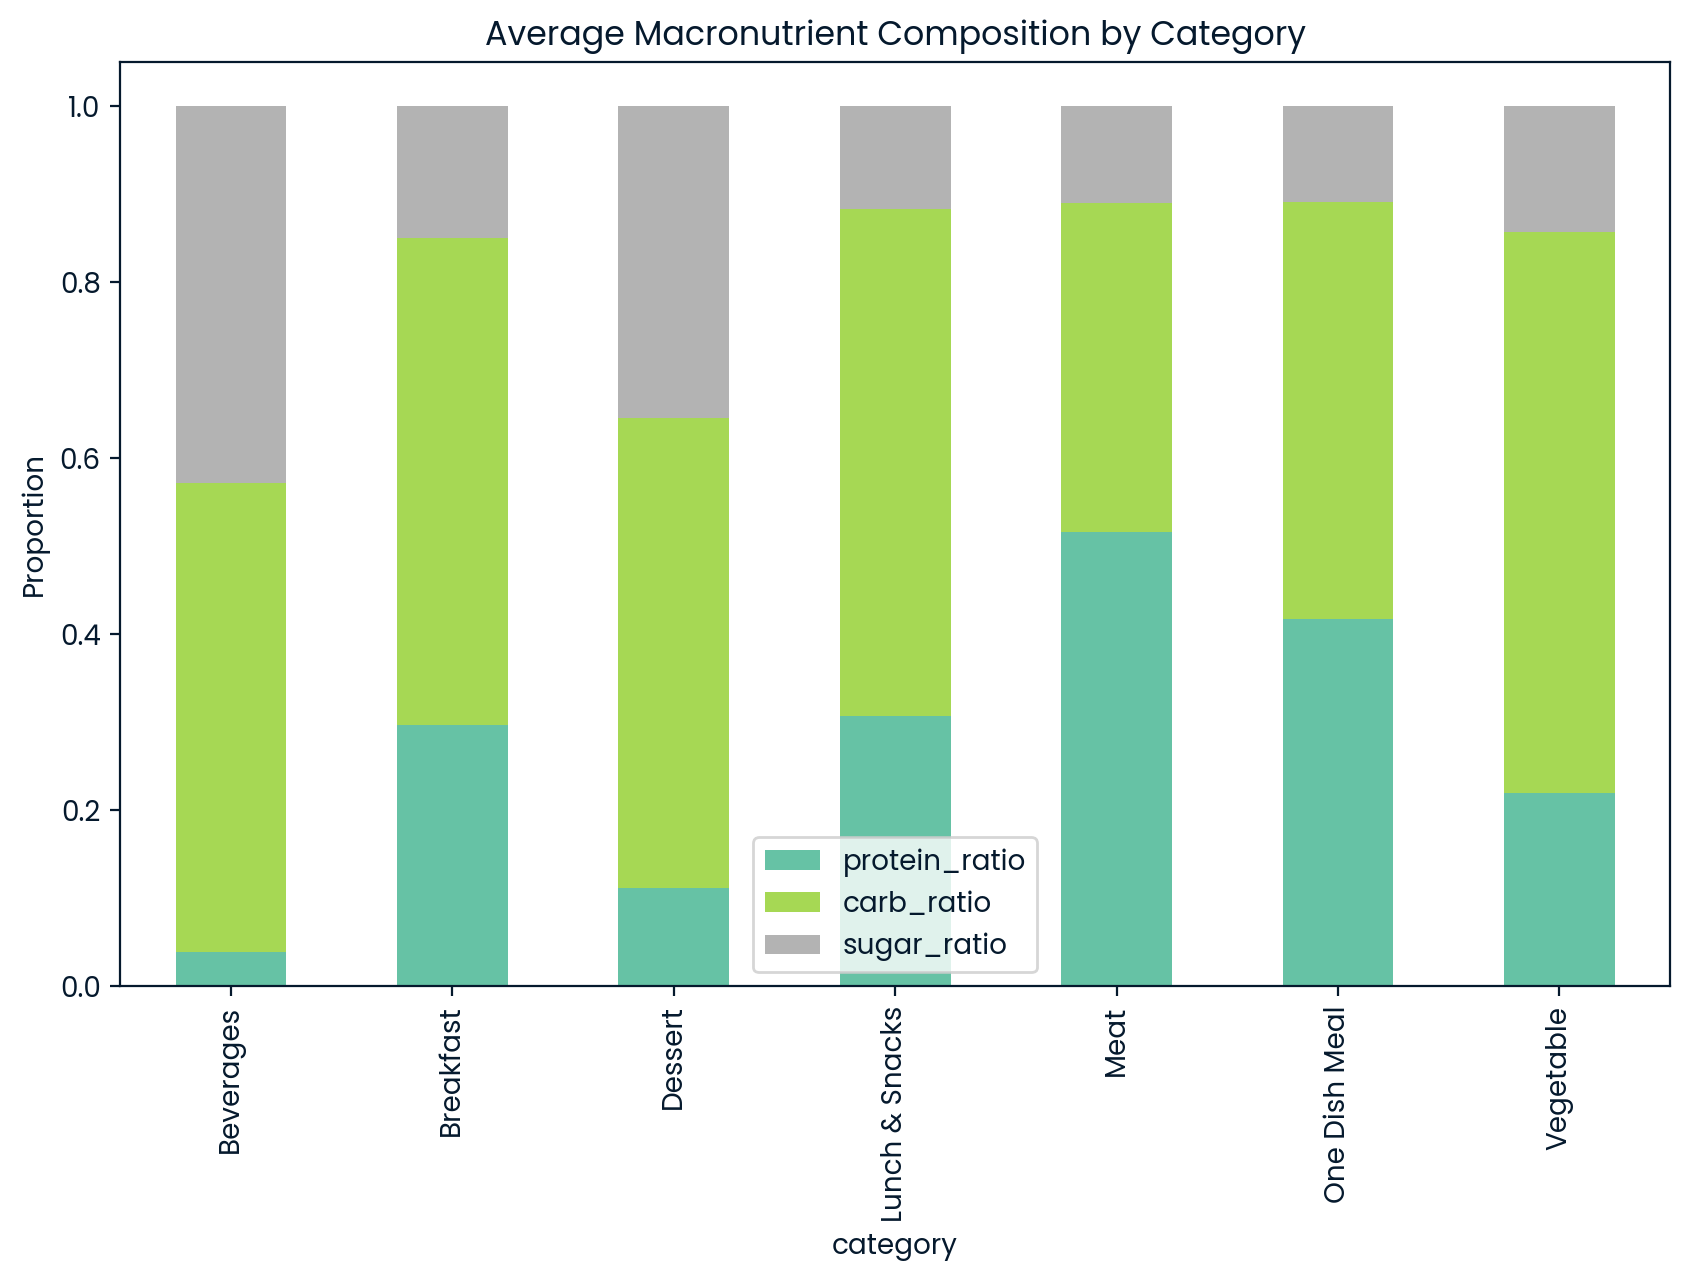

In [79]:
# Do different categories lean more on protein, carbs, or sugar?
nutrient_means = df.groupby('category')[['protein_ratio','carb_ratio','sugar_ratio']].mean()

nutrient_means.plot(kind='bar', stacked=True, figsize=(10,6), colormap="Set2")
plt.title("Average Macronutrient Composition by Category")
plt.ylabel("Proportion")
plt.show()

# ----- Finding ------
# Meat recipes are protein-heavy, Vegetables are carb-balanced, and Desserts are sugar-dominant.


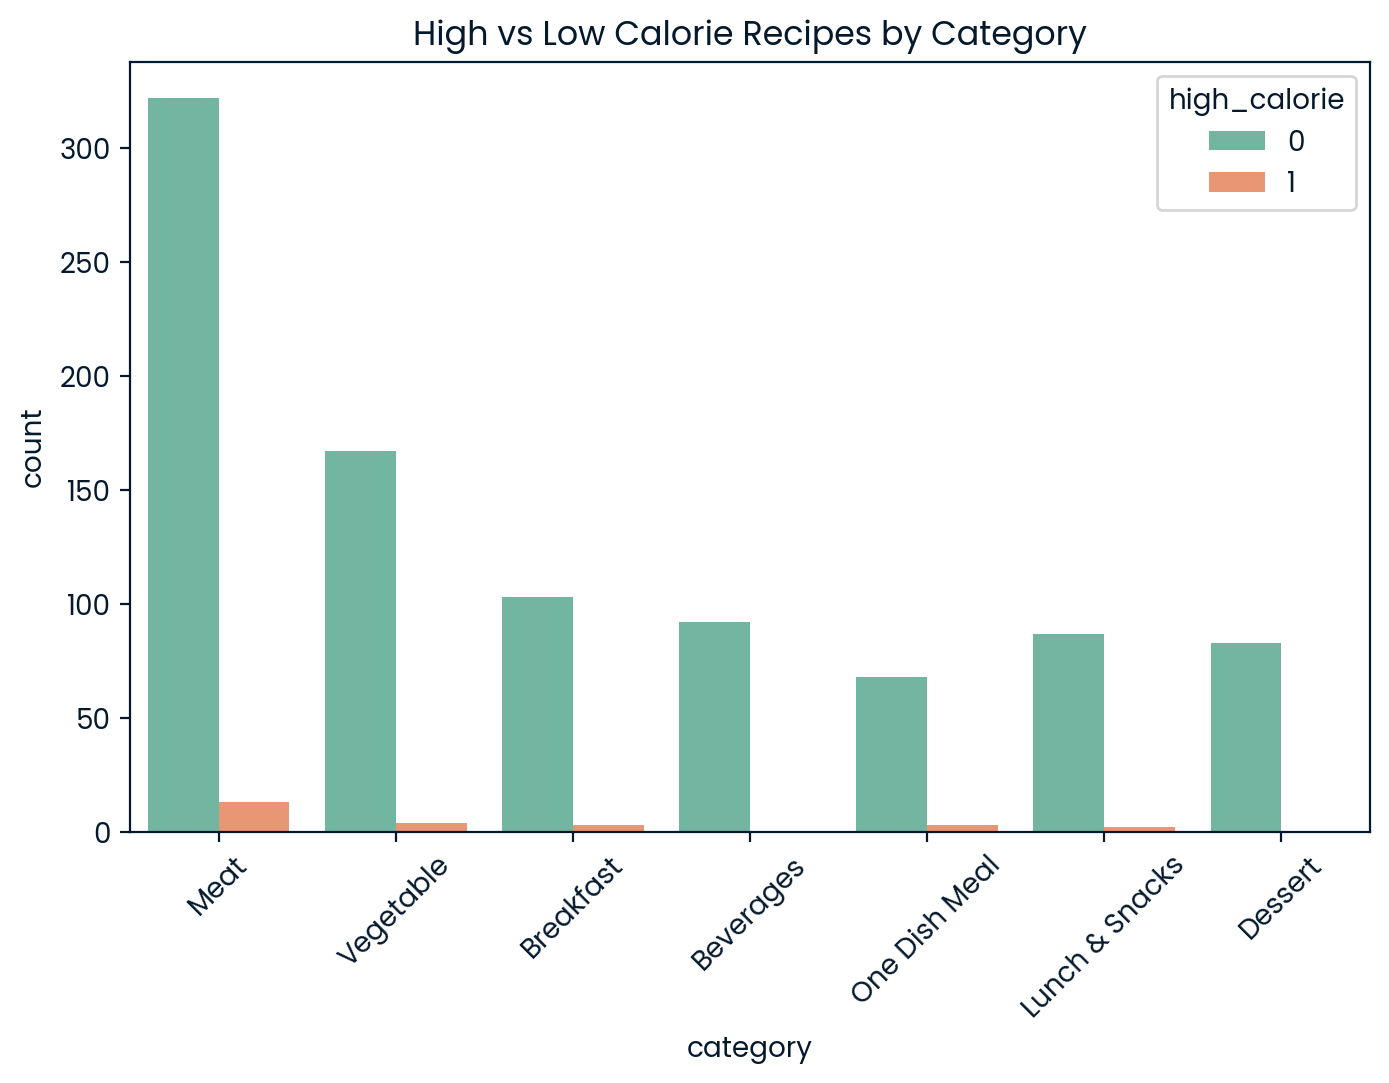

In [82]:
# What share of recipes are “light” vs “heavy” across categories?
plt.figure(figsize=(8,5))
sns.countplot(x='category', hue='high_calorie', data=df)
plt.title("High vs Low Calorie Recipes by Category")
plt.xticks(rotation=45)
plt.show()

# ----- Finding ------
# Most recipes across all categories are low-calorie, with only a very small number of high-calorie dishes appearing in Meat and, to a lesser extent, Vegetables and other categories.

# Model Development

→ **Target Candidate**: high_traffic (High vs Unknown) → categorical.

→ **Classification Problem**: predict whether a recipe is likely to attract high traffic based on its nutritional profile and category.

In [92]:
# Features: numeric + engineered
features = ['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings', 'calories_per_serving', 'protein_ratio', 'carb_ratio', 'sugar_ratio']
X = df[features]

# Target: high_traffic
y = df['high_traffic']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)  # One-hot for category
y = LabelEncoder().fit_transform(y)     # Encode target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Since the goal is to classify recipes into high vs low traffic, this is a classification problem. I selected Logistic Regression as a baseline model because it is simple and interpretable, making it easy to explain which factors drive traffic. I also trained a Decision Tree as a comparison model since it can capture non-linear relationships and interactions between nutrition and category. This allows us to balance interpretability with predictive power.

In [93]:
# Baseline Model: Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [94]:
# Comparison Model: Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Model Evaluation

In [96]:
# Predictions & probabilities
y_pred_log = log_reg.predict(X_test)
y_pred_tree = tree.predict(X_test)

y_proba_log = log_reg.predict_proba(X_test)[:,1]
y_proba_tree = tree.predict_proba(X_test)[:,1]

In [99]:
# Accuracy + Classification Report
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

print("\n---- Logistic Regression Report: ----\n", classification_report(y_test, y_pred_log))
print("---- Decision Tree Report: ----\n", classification_report(y_test, y_pred_tree))


Logistic Regression Accuracy: 0.7210526315789474
Decision Tree Accuracy: 0.6421052631578947

---- Logistic Regression Report: ----
               precision    recall  f1-score   support

           0       0.69      0.95      0.80       113
           1       0.83      0.39      0.53        77

    accuracy                           0.72       190
   macro avg       0.76      0.67      0.67       190
weighted avg       0.75      0.72      0.69       190

---- Decision Tree Report: ----
               precision    recall  f1-score   support

           0       0.69      0.72      0.70       113
           1       0.56      0.53      0.55        77

    accuracy                           0.64       190
   macro avg       0.63      0.62      0.63       190
weighted avg       0.64      0.64      0.64       190



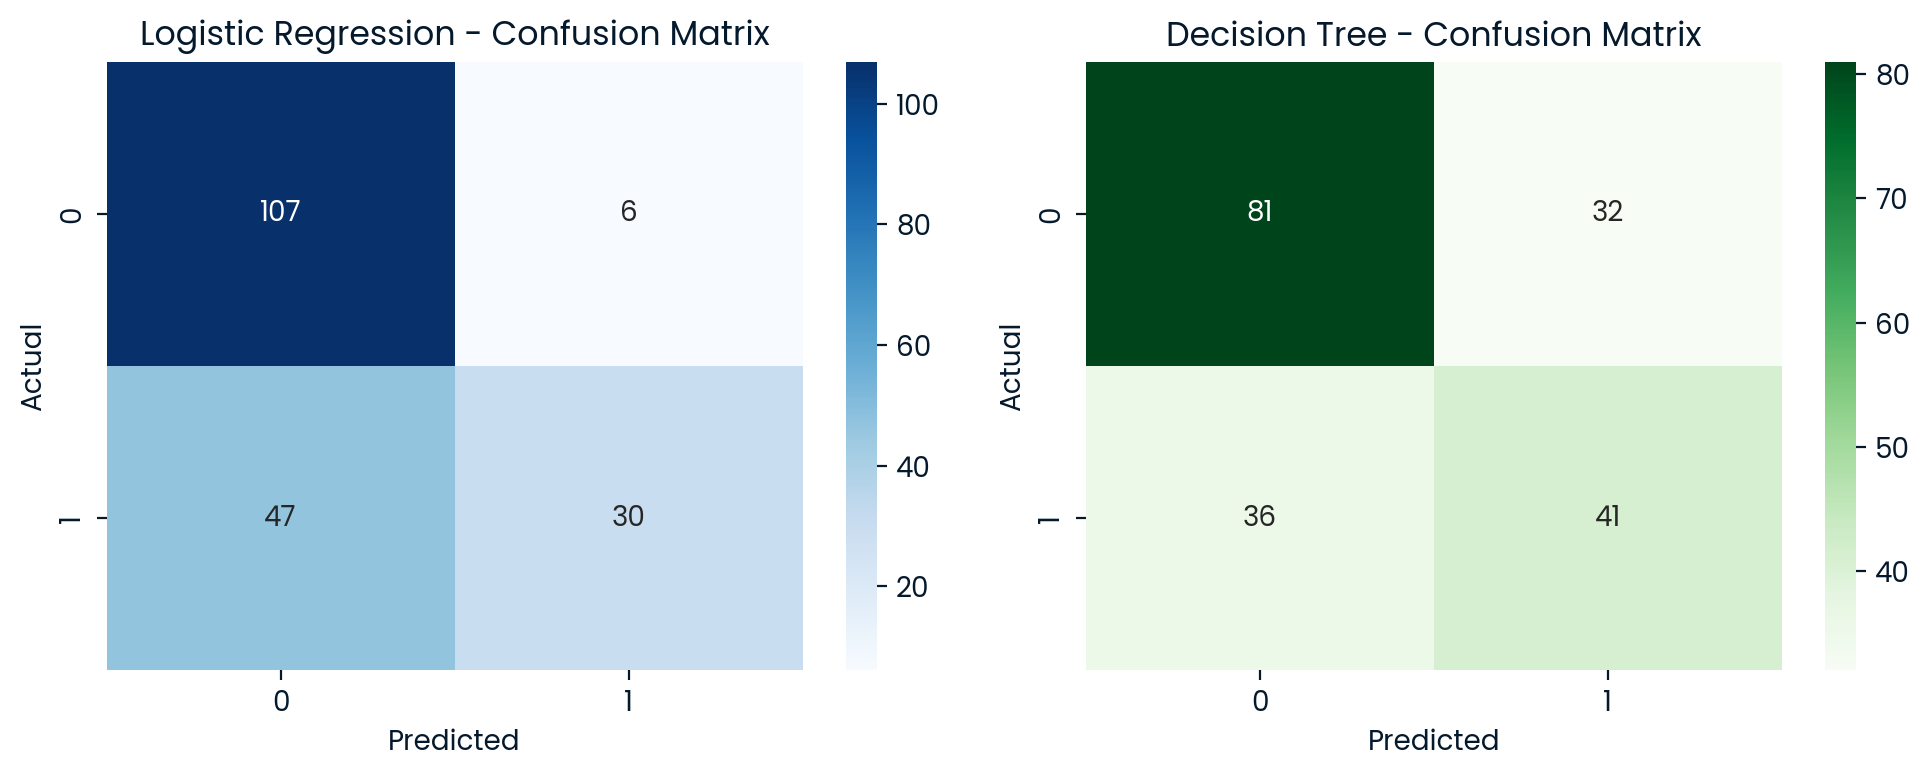

In [100]:
# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(10,4))

cm_log = confusion_matrix(y_test, y_pred_log)
cm_tree = confusion_matrix(y_test, y_pred_tree)

sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression - Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Decision Tree - Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

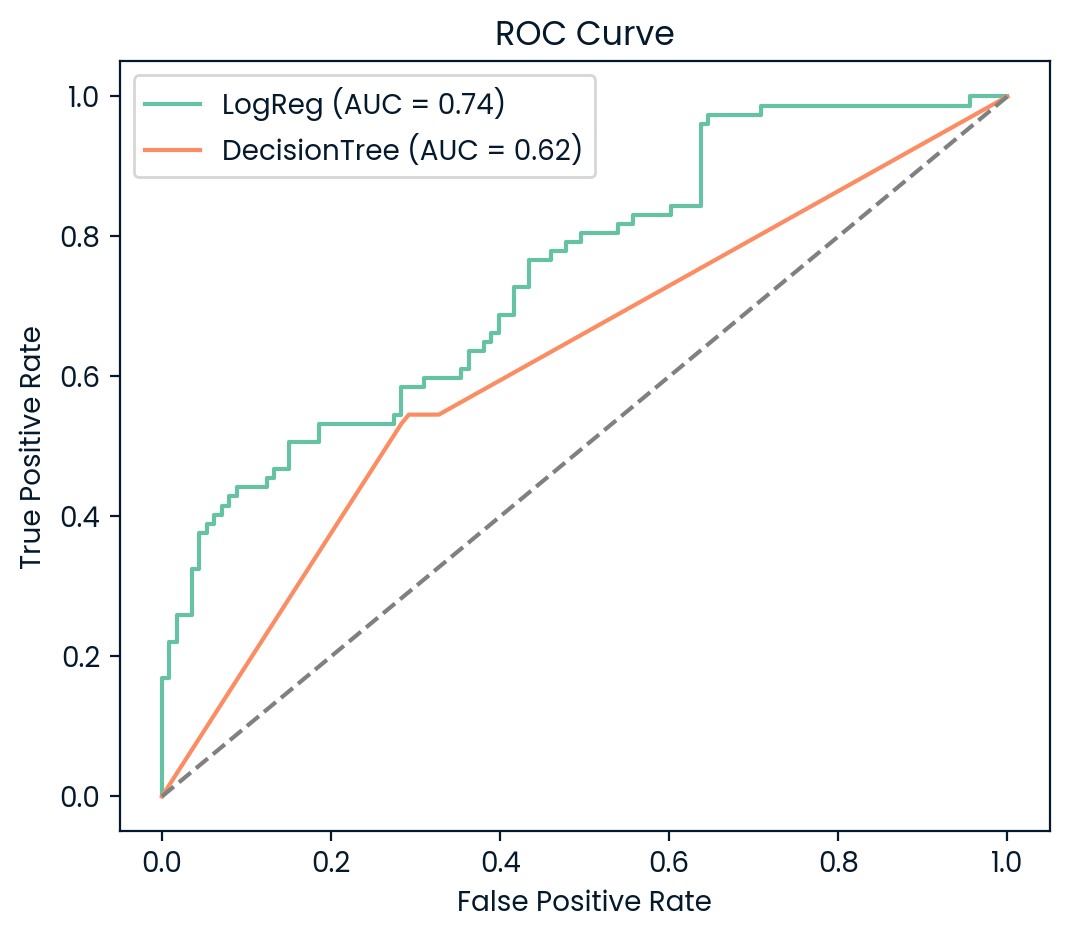

In [101]:
# ROC Curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure(figsize=(6,5))
plt.plot(fpr_log, tpr_log, label=f"LogReg (AUC = {roc_auc_log:.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"DecisionTree (AUC = {roc_auc_tree:.2f})")
plt.plot([0,1], [0,1], linestyle='--', color='grey') # baseline
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Model evaluation shows that Logistic Regression performs better overall, with 72% accuracy and an AUC of 0.74 compared to 64% accuracy and 0.62 AUC for the Decision Tree. Logistic Regression is especially precise when predicting high-traffic recipes, though it sacrifices recall. Decision Trees balanced recall slightly better but with weaker overall performance. Based on these results, Logistic Regression is the stronger candidate for reliable and interpretable predictions.

# Business Metrics

## Problem Defination

**Business Value:** → The company wants to understand which recipes are likely to attract high traffic. Prioritize popular recipes on the website/app, recommend trending meals, or invest more in promoting them.

**Business KPI:** → Correctly identifying high-traffic recipes because these drive engagement and revenue.

## Choosing a KPI (Business Metric)

**Accuracy:** → is nice, but in business terms, Recall on high-traffic recipes (class 1) is critical, we don’t want to miss popular recipes.

**Precision:** → is also relevant, we don’t want to promote “wrong” recipes too often.

## Best Business Metric

**ROC-AUC** → because it measures how well the model separates high vs low traffic across thresholds.

## Secondary Metric

**Recall** → for class 1 (High Traffic) ensures we capture most popular recipes.

## Interpreting Model Performance

## From the evaluation:

**Logistic Regression:** → AUC = 0.74, Recall (class 1) = 0.39

**Decision Tree:** → AUC = 0.62, Recall (class 1) = 0.53

## Business Implication:

→ Logistic Regression is better overall (higher AUC, better at ranking recipes).

→ Decision Tree recalls more high-traffic recipes but with worse accuracy and lower AUC (risk of over-promoting wrong ones).

## Business Metrics Final Overall Thought

From a business perspective, the key KPI is the ability to correctly identify high-traffic recipes, since these drive engagement and should be prioritized on the platform. Logistic Regression achieved an AUC of 0.74, meaning it is fairly strong at separating high vs low traffic recipes, although its recall of 39% suggests it misses many popular ones. The Decision Tree recalled more high-traffic recipes (53%) but at the cost of lower overall accuracy and a weaker AUC (0.62). For the business, Logistic Regression provides the most reliable foundation, while the Decision Tree highlights potential for improvement in capturing more popular recipes if further tuned.

# Final Summary & Recommendations

## Summary:
In this project, I validated and cleaned a dataset of 947 recipes, addressing missing values, standardizing categories, and engineering new features such as calories per serving and macronutrient ratios. Exploratory analysis showed that most recipes are low in calories, Meat dishes drive protein intake, while Beverages and Desserts contribute calories without much nutritional value.

To predict which recipes are likely to attract high traffic, I framed this as a classification problem and developed two models: Logistic Regression (baseline) and Decision Tree (comparison). Model evaluation showed that Logistic Regression achieved 72% accuracy and an AUC of 0.74, outperforming the Decision Tree (64% accuracy, AUC 0.62). While Logistic Regression was more precise in identifying popular recipes, it missed some high-traffic cases (recall 39%), whereas the Decision Tree captured more but at the cost of reliability.

## Recommendations:

1. Deploy Logistic Regression as the initial model for predicting high-traffic recipes, since it provides more stable and interpretable results.

2. Monitor Recall for high-traffic recipes as the key KPI, ensuring that the platform captures enough popular recipes without promoting irrelevant ones.

3. Iteratively improve models by tuning Decision Trees or exploring ensemble methods (e.g., Random Forest, Gradient Boosting) to improve recall while maintaining overall reliability.

4. Leverage insights from EDA: Promote Meat recipes as protein-rich highlights, position Beverages and Desserts carefully since they add calories but limited nutrition, and highlight Vegetable recipes for health-conscious users.

5. Collect more engagement data (clicks, shares, likes) to enrich the target variable (high_traffic) and further improve model training.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation